# Task-1: Predictive Modelling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
file_path = r"C:\Users\DELL\OneDrive\Desktop1\Data Science Tasks - Cognifyz\Level-3\Dataset .csv"
data = pd.read_csv(file_path)

In [3]:
if 'data' in locals():
    # Step 1: Feature Engineering
    # Extract additional features like length of restaurant name and address
    data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)
    data['Address Length'] = data['Address'].apply(len)

    # Encode categorical variables 'Has Table booking' and 'Has Online delivery'
    data['Has Table Booking'] = data['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
    data['Has Online Delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Select relevant features for the model
    features = ['Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery', 'Votes', 'Price range']
    X = data[features]
    y = data['Aggregate rating']

    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Define the models
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42)
    }

    # Step 4: Train each model and evaluate performance
    results = {}
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate model performance
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store the results
        results[model_name] = {"MSE": mse, "MAE": mae, "R2 Score": r2}
        
        # Print the performance metrics for each model
        print(f"{model_name} Performance:")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"R2 Score: {r2}\n")

    # Step 5: Compare the performance of the models
    results_df = pd.DataFrame(results).T
    print("Model Performance Comparison:\n", results_df)
else:
    print("Dataset not loaded successfully. Please check the file path and try again.")

Linear Regression Performance:
Mean Squared Error (MSE): 1.6778651605750723
Mean Absolute Error (MAE): 1.0756607794423128
R2 Score: 0.262836196456949

Decision Tree Performance:
Mean Squared Error (MSE): 0.23130559916274201
Mean Absolute Error (MAE): 0.3136054421768707
R2 Score: 0.8983767472702213

Random Forest Performance:
Mean Squared Error (MSE): 0.12450468297672443
Mean Absolute Error (MAE): 0.2315969661857417
R2 Score: 0.945299331663465

Model Performance Comparison:
                         MSE       MAE  R2 Score
Linear Regression  1.677865  1.075661  0.262836
Decision Tree      0.231306  0.313605  0.898377
Random Forest      0.124505  0.231597  0.945299


# Task-2: Customer Preference Analysis

In [4]:
# Expanding the 'Cuisines' column to account for multiple cuisines per restaurant
data_expanded = data.assign(Cuisines=data['Cuisines'].str.split(', ')).explode('Cuisines')

In [5]:
# Calculate the average rating for each cuisine type
average_rating_by_cuisine = data_expanded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Display the top 10 cuisines by average rating
print("Average Rating by Cuisine Type:\n", average_rating_by_cuisine.head(10))

Average Rating by Cuisine Type:
 Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D�_ner        4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


In [6]:
# Calculate the total votes for each cuisine to find the most popular ones
total_votes_by_cuisine = data_expanded.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Display the top 10 cuisines by number of votes
print("\nMost Popular Cuisines by Number of Votes:\n", total_votes_by_cuisine.head(10))


Most Popular Cuisines by Number of Votes:
 Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64


In [7]:
# Calculate the total votes for each cuisine to find the most popular ones
total_votes_by_cuisine = data_expanded.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Display the top 10 cuisines by number of votes
print("\nMost Popular Cuisines by Number of Votes:\n", total_votes_by_cuisine.head(10))


Most Popular Cuisines by Number of Votes:
 Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64


In [8]:
# Calculate the overall average rating
overall_avg_rating = data_expanded['Aggregate rating'].mean()

# Select cuisines with average ratings higher than the overall average rating
highly_rated_cuisines = average_rating_by_cuisine[average_rating_by_cuisine > overall_avg_rating]

# Display cuisines that have higher than average ratings
print("\nCuisines with Higher than Average Ratings:\n", highly_rated_cuisines)


Cuisines with Higher than Average Ratings:
 Cuisines
Sunda        4.900000
B�_rek       4.700000
Taiwanese    4.650000
Ramen        4.500000
Dim Sum      4.466667
               ...   
Malay        3.000000
Juices       2.993103
Desserts     2.978867
Kashmiri     2.935000
Pizza        2.921785
Name: Aggregate rating, Length: 119, dtype: float64


# Task-3: Data Visualization

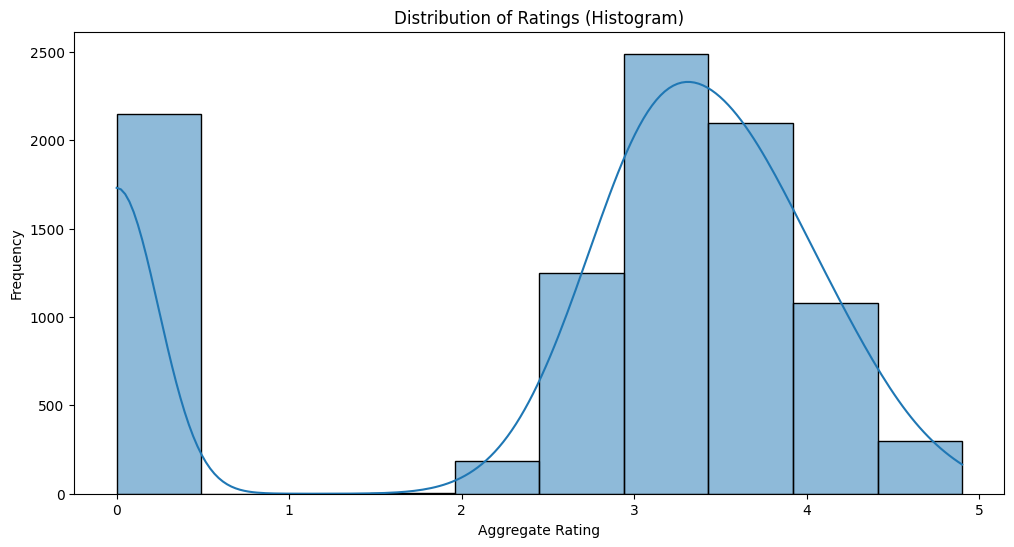

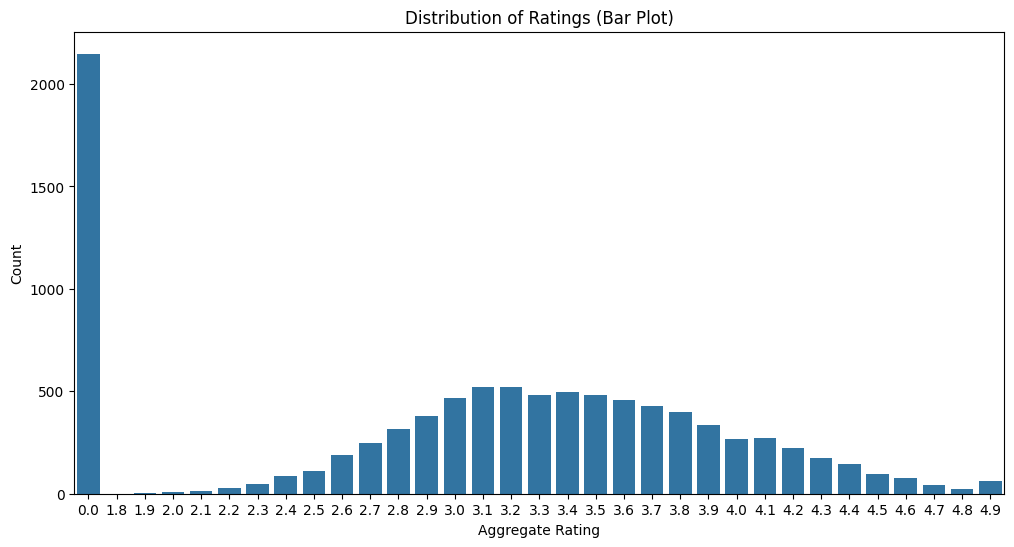

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Distribution of Ratings
plt.figure(figsize=(12, 6))
sns.histplot(data['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Ratings (Histogram)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Bar Plot for Distribution of Ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='Aggregate rating', data=data)
plt.title('Distribution of Ratings (Bar Plot)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

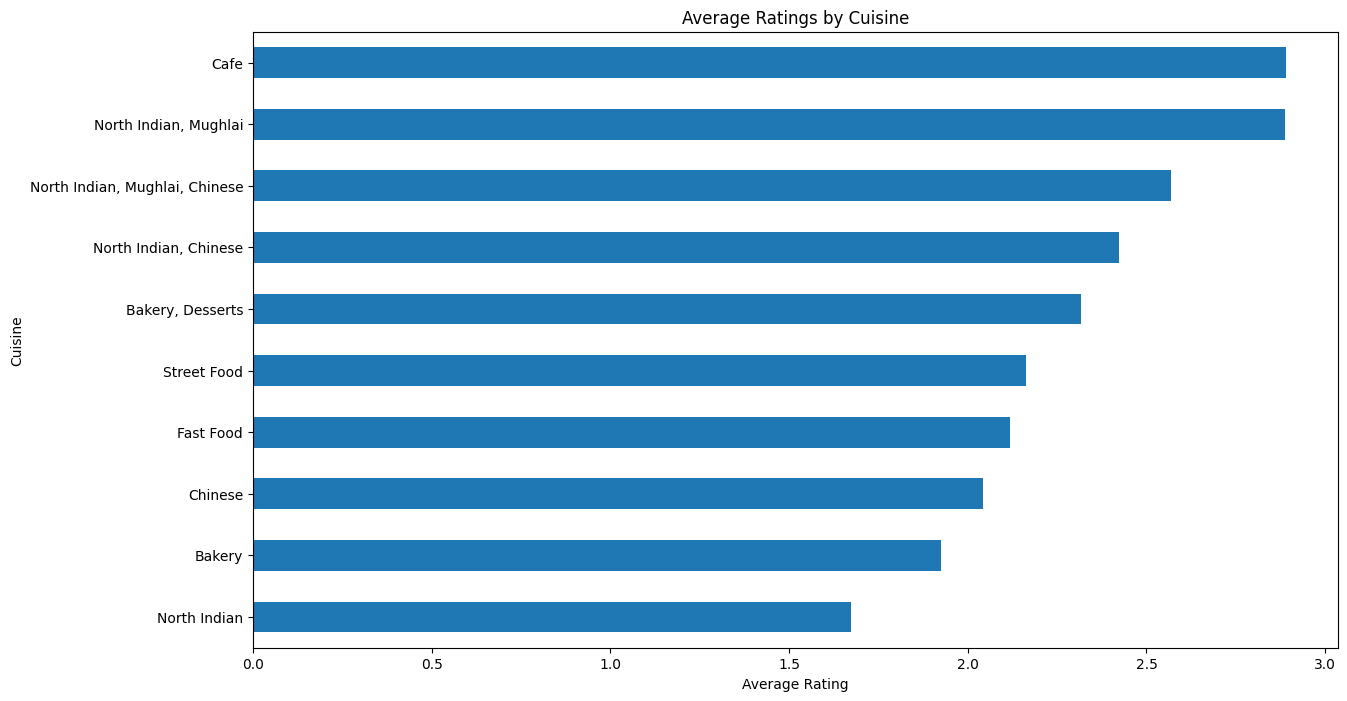

In [10]:
# Select top 10 cuisines based on frequency
top_cuisines = data['Cuisines'].value_counts().index[:10]
cuisine_data = data[data['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean().sort_values()

plt.figure(figsize=(14, 8))
cuisine_data.plot(kind='barh')
plt.title('Average Ratings by Cuisine')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

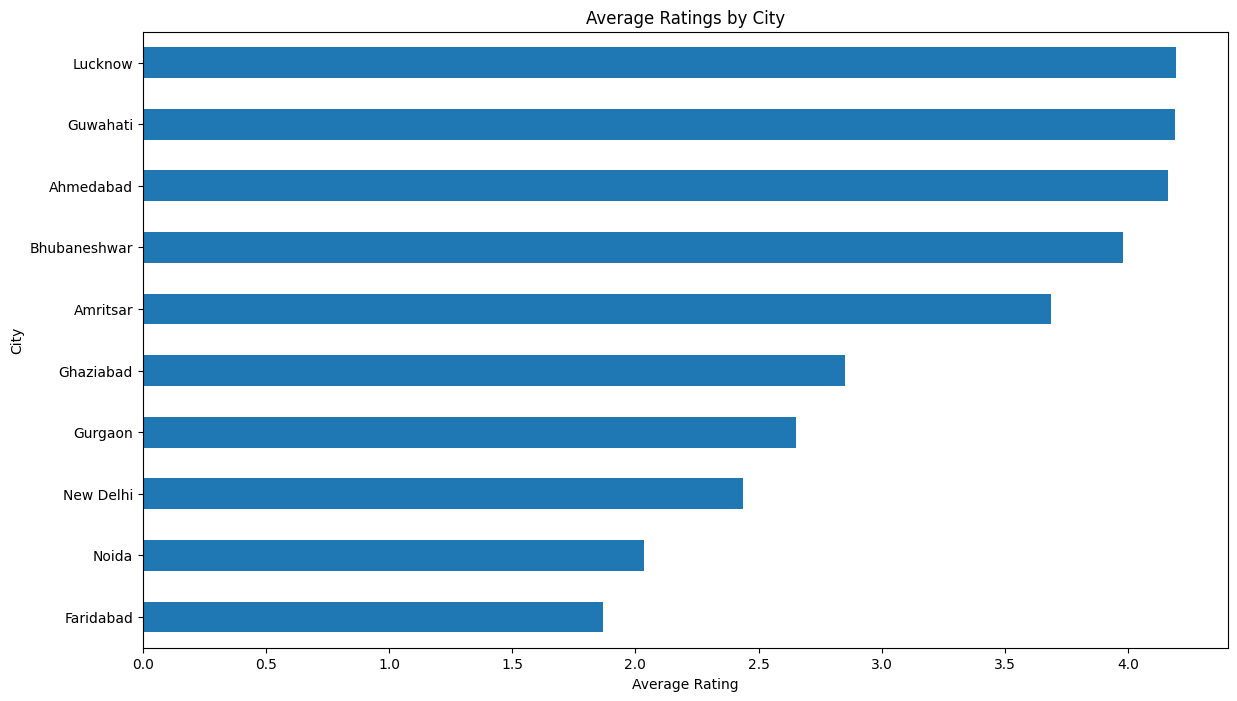

In [11]:
# Select top 10 cities based on frequency
top_cities = data['City'].value_counts().index[:10]
city_data = data[data['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values()

plt.figure(figsize=(14, 8))
city_data.plot(kind='barh')
plt.title('Average Ratings by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

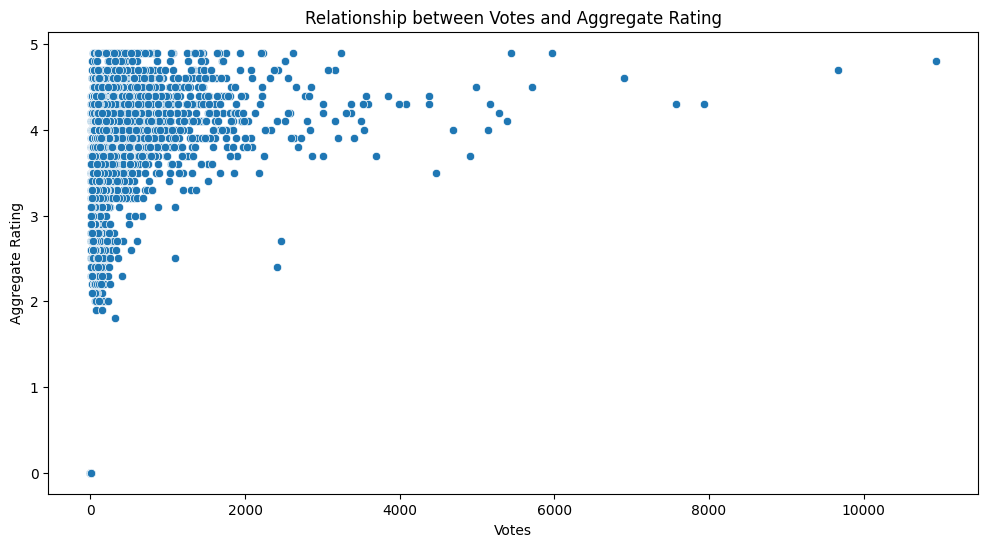

In [12]:
# Scatter plot to show the relationship between Votes and Aggregate Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data)
plt.title('Relationship between Votes and Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

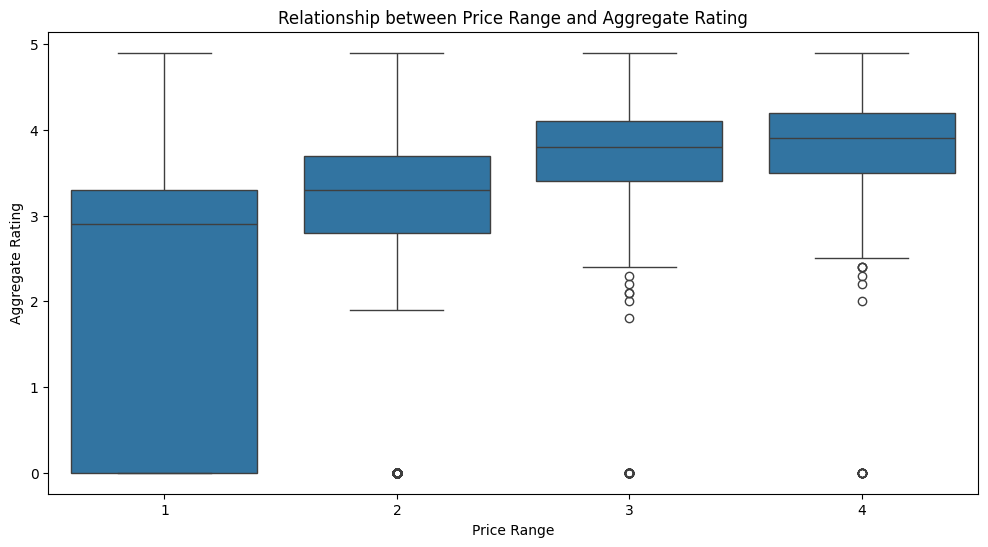

In [13]:
# Box plot to show the relationship between Price Range and Aggregate Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=data)
plt.title('Relationship between Price Range and Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()